# procs analysis
procs contains much more data than 'get_jobs' pulls. Using 'get_procs' will allow us to pull much more complexed forms of data, and see the movemnet of information in a more step by step format.

In this notebook, we are looking to build the basics of analysis with procs. First this will involve breaking a single job down into its timed components and building a full time break down of a job.

In [23]:
# import  epmt query
print('importing epmt_query')
import epmt_query as eq
# import matplot for better plotting functions
import sys
sys.path.insert(0,'/home/Ian.Laflotte/ians_py374/pip_experiment')   # required for plt to import
import matplotlib.pyplot as plt
import numpy as np
# import pandas. optional but helpful 'display.max_columns' arg shows all DataFrame columns when printing
print('importing pandas')
import pandas
pandas.set_option('display.max_columns', None)
#timing
import time


importing epmt_query
importing pandas


In [24]:
#use orm format to get jobs and then feed to get_procs for a quicker run time
username = 'Avery.Kiihne'
jobs_all = eq.get_jobs(fltr=(eq.Job.user_id == username),
                       before = -7,
                       offset = 5,                      #offset cuts off that number of jobs from the rquest
                       fmt='orm')
print(jobs_all)

SELECT jobs.created_at AS jobs_created_at, jobs.updated_at AS jobs_updated_at, jobs.info_dict AS jobs_info_dict, jobs.annotations AS jobs_annotations, jobs.analyses AS jobs_analyses, jobs.start AS jobs_start, jobs."end" AS jobs_end, jobs.duration AS jobs_duration, jobs.proc_sums AS jobs_proc_sums, jobs.env_dict AS jobs_env_dict, jobs.env_changes_dict AS jobs_env_changes_dict, jobs.submit AS jobs_submit, jobs.jobid AS jobs_jobid, jobs.jobname AS jobs_jobname, jobs.exitcode AS jobs_exitcode, jobs.user_id AS jobs_user_id, jobs.tags AS jobs_tags, jobs.cpu_time AS jobs_cpu_time 
FROM jobs 
WHERE jobs.user_id = %(user_id_1)s AND jobs."end" <= %(end_1)s ORDER BY jobs.start 
 LIMIT ALL OFFSET %(param_1)s


In [25]:
# retrieve all jobs corresponding to below criteria/tag(s)
# potential criteria are before/after job start/end/creation times, 
# potential tags are exp_component, exp_name, exp_time, exp_platform, and exp_target (i.e. command line args to frepp)
# potential output formats are dict, pandas, terse, and orm
start = time.time()
procs_all = eq.get_procs(jobs = jobs_all,
                       fmt='dict')
print(f'number of elements in procs_all={len(procs_all)}')

print("time:",(time.time()-start)/60)

number of elements in jobs_all=47621
time: 0.7532081604003906


In [4]:
#make list of unique exename
exename_list = [] 
for procs_instance in range(len(procs_all)):
    exename_list.append(procs_all[procs_instance]['exename'])
exename_list = set(exename_list)
#make dictionary with each unique name as a key
exename_duration_dict = {}
wr_bytes_dict = {}
rd_bytes_dict = {}
for dict_key in exename_list:   #each tag group has its own key in variable dictonary
    exename_duration_dict[dict_key] = []
    wr_bytes_dict[dict_key] = []
    rd_bytes_dict[dict_key] = []
for procs_instance in range(len(procs_all)):   #now we can run through evry proc and grab its specific duration to attach to its exename
    dict_key_instance = procs_all[procs_instance]['exename']
    exename_duration_dict[dict_key_instance].append(procs_all[procs_instance]['duration'])
    wr_bytes_dict[dict_key_instance].append(procs_all[procs_instance]['write_bytes'])
    rd_bytes_dict[dict_key_instance].append(procs_all[procs_instance]['read_bytes'])
for dict_key in exename_list:
    wr_bytes_dict[dict_key] = sum(wr_bytes_dict[dict_key])
for dict_key in exename_list:
    exename_duration_dict[dict_key] = sum(exename_duration_dict[dict_key])

Text(0, 0.5, 'total duration (nanoseconds)')

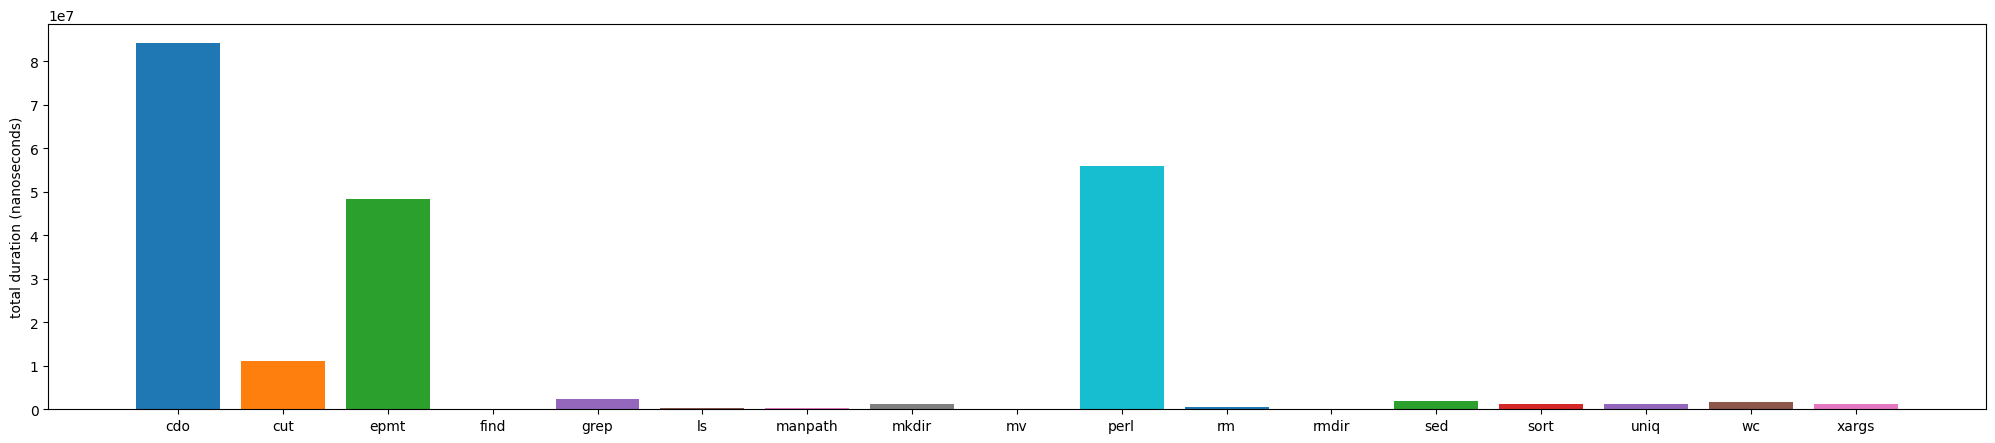

In [10]:
#choose which kinds of operations to plot
chosen_list = ['cdo','cut', 'epmt', 'find', 'grep', 'ls', 'manpath', 'mkdir', 'mv', 'perl', 'rm', 'rmdir', 'sed', 'sort', 'uniq','wc','xargs']
plt.style.use('default')
plt.figure(figsize = (25, 5))
for chosen_name in chosen_list:
    plt.bar(chosen_name,exename_duration_dict[chosen_name])
plt.ylabel('total duration (nanoseconds)')
#plt.yscale('log')

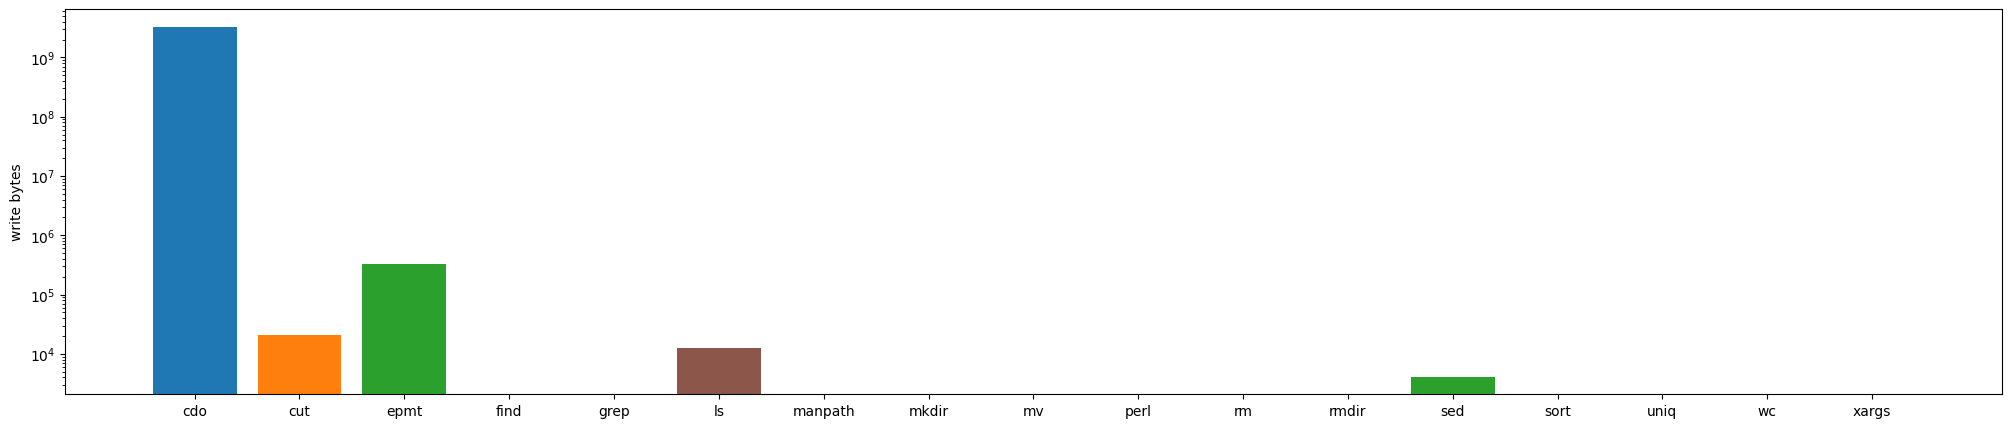

In [6]:
plt.style.use('default')
plt.figure(figsize = (25, 5))
for chosen_name in chosen_list:
    plt.bar(chosen_name,wr_bytes_dict[chosen_name])
plt.ylabel('write bytes')
plt.yscale('log')

# efficiency of nodes

In [ ]:
#make list of unique exename
node_list = [] 
for procs_instance in range(len(procs_all)):
    exename_list.append(procs_all[procs_instance]['exename'])
exename_list = set(exename_list)
#make dictionary with each unique name as a key
exename_duration_dict = {}
wr_bytes_dict = {}
rd_bytes_dict = {}
for dict_key in exename_list:   #each tag group has its own key in variable dictonary
    exename_duration_dict[dict_key] = []
    wr_bytes_dict[dict_key] = []
    rd_bytes_dict[dict_key] = []
for procs_instance in range(len(procs_all)):   #now we can run through evry proc and grab its specific duration to attach to its exename
    dict_key_instance = procs_all[procs_instance]['exename']
    exename_duration_dict[dict_key_instance].append(procs_all[procs_instance]['duration'])
    wr_bytes_dict[dict_key_instance].append(procs_all[procs_instance]['write_bytes'])
    rd_bytes_dict[dict_key_instance].append(procs_all[procs_instance]['read_bytes'])
for dict_key in exename_list:
    wr_bytes_dict[dict_key] = sum(wr_bytes_dict[dict_key])
for dict_key in exename_list:
    exename_duration_dict[dict_key] = sum(exename_duration_dict[dict_key])

In [103]:
sum_list = []
for name in exename_list:
    sum_list.append(exename_duration_dict[name])
combo = zip(sum_list, exename_list)
ordered_list = sorted(combo)
ordered_list

[(675.0, '/usr/bin/hostname'),
 (688.0, '/bin/hostname'),
 (1502.0, 'id'),
 (1541.0, 'env'),
 (1724.0, '/bin/uname'),
 (1829.0, 'dirname'),
 (3211.0, 'uname'),
 (3550.0, 'tty'),
 (4355.0, 'dircolors'),
 (9350.0, 'echo'),
 (11049.0, 'rmdir'),
 (13852.0, 'find'),
 (16782.0, 'basename'),
 (36377.0,
  '/home/fms/local/epmt/4.9.2-centos-7/papiex-epmt-install/bin/papi_component_avail'),
 (50713.0, '/usr/bin/id'),
 (70638.0, 'mv'),
 (123771.0, '/bin/grep'),
 (252554.0, 'manpath'),
 (366401.0, '/home/oar.gfdl.sw/conda/miniconda3/envs/cylc/bin/python3.9'),
 (371405.0, 'ls'),
 (524895.0, 'rm'),
 (1120566.0, 'xargs'),
 (1135165.0, 'sort'),
 (1138487.0, 'uniq'),
 (1141396.0, '/bin/csh'),
 (1179785.0, 'mkdir'),
 (1355433.0,
  '/home/fms/local/epmt/4.9.2-centos-7/papiex-epmt-install/bin/papi_command_line'),
 (1646287.0, 'wc'),
 (1853402.0, 'sed'),
 (2260552.0, 'grep'),
 (2934168.0, '/bin/sh'),
 (11183016.0, 'cut'),
 (48372497.0, 'epmt'),
 (56013949.0, 'perl'),
 (84316163.0, 'cdo'),
 (293418745.0, '/

## procs of components
We will break down a run into components, and construct each component from its individual parts from procs.

In [ ]:
#gathering data for plotting
#currently listing component names by hand, will need to automate
comp_list = ['land','atmos','stage-history','atmos_scalar','PLACE_HOLDER','land.static']
username = 'avery.kiihne'
#runs a get job individually for each component
for comp in comp_list:
    jobs_comp = eq.get_jobs(fltr=(eq.Job.user_id == username),
                           tags = 'exp_component:'+comp,
                           fmt='orm')
    procs_all = eq.get_procs(jobs = jobs_comp,
                       fmt='dict')
    #converts data into form for graph
    
    averages_dur.append(sum(jobs_comp['duration'])/len(jobs_comp['duration']))


#Pull tags in order to get experiment name
job_tags=eq.get_job_tags(jobs=jobs_all)
experiment_name = job_tags['exp_name']